In [1]:
#importing the file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Spliting the Data
x = dataset.iloc[:,3:13].values
y = dataset.iloc[: , 13].values

In [5]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [7]:
# We have to make uncoding on city and gender for city we have to also use one hot encoding to avoid dummy trap

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer

# we convert categoris into numbers using label encoder

#for City
labelencode_x1 = LabelEncoder()
x[:,1] = labelencode_x1.fit_transform(x[:,1])

#for gender
labelencode_x2 = LabelEncoder()
x[:,2] = labelencode_x2.fit_transform(x[:,2])

In [8]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
#now as you can see in city column we have three categoris to avoid high and lower value conflict we have to divid in categorical features
# so we Use on Hot Encoding


#here in column features we have to mention which column we have to categorize...
# OneHotEncoder
onehandencoder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],remainder='passthrough')   

# The column numbers to be transformed (here is [0] but can be [0, 1, 3])                                        
# Leave the rest of the columns untouched


x = onehandencoder.fit_transform(x)

In [10]:
x # now it will perfact categorize and now we delete first row to avoid DUMMY VARIABLE TRAP

x = x[ :,1:]

In [11]:
pd.DataFrame(x)  # for viewing purpose we convert it into frame as you can see first 2 col for city and 4 col for gender

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [12]:
# now We can apply Split for train and test set..

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size =0.2 , random_state=0)

In [13]:
x_test.shape

(2000, 11)

In [14]:
# we required feature scaling must in ARTIFICIAL NEURAL NETWORKS because we have to to mane computation in mathemetical term

from sklearn.preprocessing import StandardScaler
x = StandardScaler()
x_train = x.fit_transform(x_train)
x_test = x.fit_transform(x_test)

In [15]:
x_train # now every thing is scaled..

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

# Artificial Neural Network

###### When we are using k cross fold this protion not run we have to run final part of progamme.

Dropout : It is a regualrization techinque used for to prevent overfitting.In this method we randmoly disabled some neurons while its complie so other neurons have to learn more hard so it prevent overfitting

Genrally overfitting occure when model occur high accuracy on train set rather then test set so it is high varience.

In dropout one argument is rate which means how many neurons you have to disable ex. for one neurons 0.1 for two 0.2 and so on..
But When we apply above 0.5 rate then it genrate underfitting nerons not learn to much...

In [23]:
# importing libreries
import keras
from keras.models import Sequential # use for to intialize our ANN model
from keras.layers import Dense # use for To create different layers in out Deep Model
from keras.layers import Dropout # dropout regualarization

### First Hidden Layer

In [17]:
## now we are intialize our model first
# so we are creating object of Sequential class
#dropout we have to add in layers

classifier = Sequential()

#here we create first layer using dense function
# in dense we have to specify no. of hidden layer as units
# which activation function use in hidden layers
# how many input units for input layer as input_dim and this is COMPLUSORY TO specify..
# init used to distributed weights of our model and which methos apply to distribut them that we have to specify..
# input variable are nothing else but all independent variables

classifier.add(Dense(units = 6 , activation='relu' , input_dim = 11 , init='uniform'))
classifier.add(Dropout(rate = 0.1))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", input_dim=11, kernel_initializer="uniform")`
  del sys.path[0]


### Second Hidden Layer

In [18]:
# second time we don't need to mention input dim because calculate automatically from first layer 
# we choose activation as relu because it is not final laey it is also hidden layer..


classifier.add(Dense(units = 6 , activation='relu', init='uniform'))
classifier.add(Dropout(rate = 0.1))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  """


##### If we have to categorize or output in more then two categorize then we have to use SOFTMAX() 

### Final Output Layer

In [19]:
# here we have units=1 because in our predictions we have only two categories so we mention units=1
# activation = sigmoid because we need probabilities of our output
# genrelly signmoid is very useful in binary classification...

classifier.add(Dense(units = 1 , activation='sigmoid', init='uniform'))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """


### Complie the Model or Gradient Descent

In [20]:
### optimizer is used to stochistic gradient descent and method name is 'adam' so adam is stochistic gradient descent
# loss is loss function binary_crossentropy use for binary classification and for more then features we use categorical_crossentropy
# final agrument metrices is used to how our gradient descent decide next values as per accuracies so then next accuracy can increase
# when weights are updated algorithem used this metrices of accuracy to improve the model


classifier.compile(optimizer = 'adam' , loss ='binary_crossentropy' , metrics=['accuracy'])

### Fit the model on training set

In [21]:
# batch size is no. of observation after which you want to update your weights
# epoch is a round when the whole training set pass through ANN.. & it is applying above steps over many epoch

classifier.fit(x_train , y_train , batch_size=10 , epochs=50)

Epoch 1/50
8000/8000 [==============================] - 1s 93us/step - loss: 0.4759 - accuracy: 0.7958
Epoch 2/50
8000/8000 [==============================] - 1s 78us/step - loss: 0.4286 - accuracy: 0.7960
Epoch 3/50
8000/8000 [==============================] - 1s 78us/step - loss: 0.4224 - accuracy: 0.7995
Epoch 4/50
8000/8000 [==============================] - 1s 79us/step - loss: 0.4179 - accuracy: 0.8250
Epoch 5/50
8000/8000 [==============================] - 1s 79us/step - loss: 0.4163 - accuracy: 0.8276
Epoch 6/50
8000/8000 [==============================] - 1s 78us/step - loss: 0.4144 - accuracy: 0.8294
Epoch 7/50
8000/8000 [==============================] - 1s 81us/step - loss: 0.4129 - accuracy: 0.8319
Epoch 8/50
8000/8000 [==============================] - 1s 82us/step - loss: 0.4117 - accuracy: 0.8313
Epoch 9/50
8000/8000 [==============================] - 1s 83us/step - loss: 0.4112 - accuracy: 0.8328
Epoch 10/50
8000/8000 [==============================] - 1s 84us/step - l

### Predict the Result 

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
pd.DataFrame(y_pred)

,0
0,0.194568
1,0.332753
2,0.165915
3,0.051355
4,0.179191
...,...
1995,0.032298
1996,0.103744
1997,0.166711
1998,0.188118


In [24]:
y_pred = (y_pred > 0.5) # we are converting probabilities into true or flase so wen get calculated confusion_matrix

In [25]:
pd.DataFrame(y_pred).head(25)

,0
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,False
9,True


### Confusion matrix

<IPython.core.display.Javascript object>


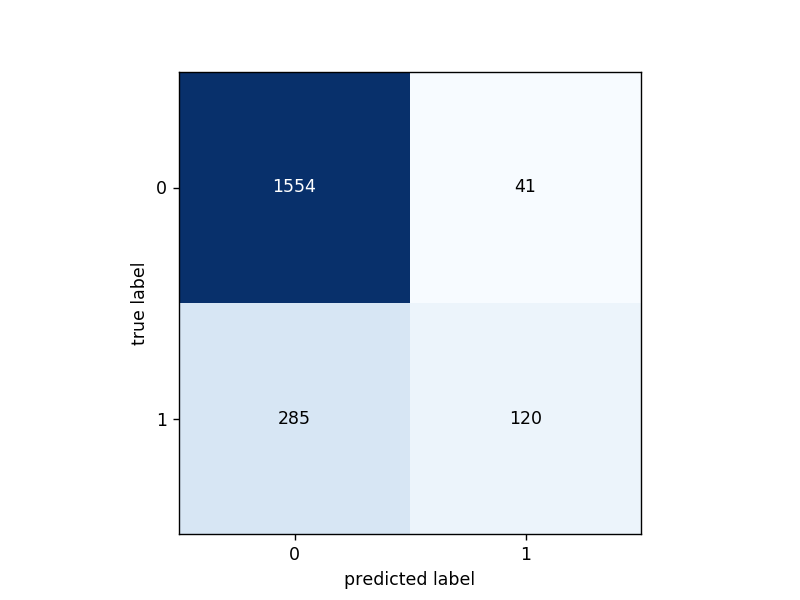

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b7345d3f08>)

In [26]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,y_pred)

%matplotlib notebook
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)


### Accuract of Over all model

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.837

### Now we are adding our data to predict customer is stay in bank or leave ?

In [28]:
'''
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000
'''


new_pred = classifier.predict(x.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
new_pred = (new_pred > 0.5)

In [29]:
print(new_pred)

[[False]]


### Evaluting Model of ANN

##### In this evalution we are using k cross fold validation to check what is the correct accuracy of model. because every time we run the model it genrates different accuracies so we check it's accurary with help of K cross...

In [16]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# in kerasclassifer one argument is build function so we create our ANN in bulid function and call it in kerasclassifier
# in this case k corss is scikit learn class and Keras is different librarey so we use wrapper class of keras class
# we are just taken above code in function.
# NOTE : We are not including fit section in function because this task done by keras classifier
# in this function classifer has scope of local so we create other classifier which scopes is global.

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6 , activation='relu' , input_dim = 11 , init='uniform'))
    classifier.add(Dense(units = 6 , activation='relu', init='uniform'))
    classifier.add(Dense(units = 1 , activation='sigmoid', init='uniform'))
    classifier.compile(optimizer = 'adam' , loss ='binary_crossentropy' , metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier , batch_size=10 , epochs=50 )
accuracies = cross_val_score(estimator=classifier , X=x_train , y = y_train , cv = 10 , n_jobs=-1)

# estimator is classifeir name
# cv is no. of fold or no of partition of trainset use for evealution
# n_jobs is specially made for using all CPU power so it is use in DEEL LEARNING


In [17]:
accuracies

array([0.83875   , 0.85124999, 0.83125001, 0.82125002, 0.84875   ,
       0.85374999, 0.83625001, 0.82499999, 0.82249999, 0.84750003])

### Mean & Varience

In [18]:
mean = accuracies.mean()
sd = accuracies.std()

In [19]:
mean

0.8376250028610229

In [20]:
sd

0.011692009601523829

So we conclude that model has 83 % accuracy and 1.1 % varience.

#### LOW BIAS AND LOW VARIENCE MODEL

## Parameter Tunning

We use grid search for this parameter tunning

In [28]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6 , activation='relu' , input_dim = 11 , init='uniform'))
    classifier.add(Dense(units = 6 , activation='relu', init='uniform'))
    classifier.add(Dense(units = 1 , activation='sigmoid', init='uniform'))
    classifier.compile(optimizer = 'adam' , loss ='binary_crossentropy' , metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier) # here we are not meintion epochs and batch-size we find it by GridSearchCV
parameters = {'batch_size':[20,25,35,40],
              'epochs':[50,100,150,500],
              }

grid_search = GridSearchCV(estimator=classifier ,
                          param_grid= parameters,
                          cv = 10,
                          n_jobs=-1,
                          scoring='accuracy')

grid_search = grid_search.fit(x_train , y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", input_dim=11, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/500
8000/8000 [==============================] - 0s 61us/step - loss: 0.5550 - accuracy: 0.7949
Epoch 2/500
8000/8000 [==============================] - 0s 32us/step - loss: 0.4368 - accuracy: 0.7960 0s - loss: 0.4624 - accuracy
Epoch 3/500
8000/8000 [==============================] - 0s 31us/step - loss: 0.4315 - accuracy: 0.7960
Epoch 4/500
8000/8000 [==============================] - 0s 32us/step - loss: 0.4286 - accuracy: 0.7960
Epoch 5/500
8000/8000 [==============================] - 0s 32us/step - loss: 0.4268 - accuracy: 0.7960
Epoch 6/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.4244 - accuracy: 0.7960
Epoch 7/500
8000/8000 [==============================] - 0s 30us/step - loss: 0.4215 - accuracy: 0.8025
Epoch 8/500
8000/8000 [==============================] - 0s 30us/step - loss: 0.4193 - accuracy: 0.8211
Epoch 9/500
8000/8000 [==============================] - 0s 30us/step - loss: 0.4179 - accuracy: 0.8231
Epoch 10/500
8000/8000 [===========

8000/8000 [==============================] - 0s 33us/step - loss: 0.3992 - accuracy: 0.8355
Epoch 155/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3997 - accuracy: 0.8345
Epoch 156/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3992 - accuracy: 0.8345
Epoch 157/500
8000/8000 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.83 - 0s 32us/step - loss: 0.3992 - accuracy: 0.8354
Epoch 158/500
8000/8000 [==============================] - 0s 32us/step - loss: 0.3994 - accuracy: 0.8340
Epoch 159/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3995 - accuracy: 0.8354
Epoch 160/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3993 - accuracy: 0.8353
Epoch 161/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3994 - accuracy: 0.8345
Epoch 162/500
8000/8000 [==============================] - 0s 33us/step - loss: 0.3996 - accuracy: 0.8345
Epoch 163/500
8000

8000/8000 [==============================] - 1s 70us/step - loss: 0.3997 - accuracy: 0.8346
Epoch 307/500
8000/8000 [==============================] - 1s 75us/step - loss: 0.3992 - accuracy: 0.8342
Epoch 308/500
8000/8000 [==============================] - 1s 72us/step - loss: 0.3992 - accuracy: 0.8340
Epoch 309/500
8000/8000 [==============================] - 1s 72us/step - loss: 0.3989 - accuracy: 0.8353
Epoch 310/500
8000/8000 [==============================] - 1s 72us/step - loss: 0.3994 - accuracy: 0.8341
Epoch 311/500
8000/8000 [==============================] - 1s 73us/step - loss: 0.3993 - accuracy: 0.8345
Epoch 312/500
8000/8000 [==============================] - 1s 73us/step - loss: 0.3992 - accuracy: 0.8341
Epoch 313/500
8000/8000 [==============================] - 1s 72us/step - loss: 0.3991 - accuracy: 0.8346
Epoch 314/500
8000/8000 [==============================] - 1s 74us/step - loss: 0.3994 - accuracy: 0.8344
Epoch 315/500
8000/8000 [==============================] - 1

8000/8000 [==============================] - 0s 34us/step - loss: 0.3993 - accuracy: 0.8341
Epoch 459/500
8000/8000 [==============================] - 0s 35us/step - loss: 0.3992 - accuracy: 0.8347
Epoch 460/500
8000/8000 [==============================] - 0s 35us/step - loss: 0.3991 - accuracy: 0.8334
Epoch 461/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.3990 - accuracy: 0.8346
Epoch 462/500
8000/8000 [==============================] - 0s 35us/step - loss: 0.3992 - accuracy: 0.8346
Epoch 463/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.3991 - accuracy: 0.8359
Epoch 464/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.3992 - accuracy: 0.8357
Epoch 465/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.3992 - accuracy: 0.8346
Epoch 466/500
8000/8000 [==============================] - 0s 34us/step - loss: 0.3993 - accuracy: 0.8347
Epoch 467/500
8000/8000 [==============================] - 0

In [29]:
best_accuracy


0.8527500000000001

In [30]:
best_parameters

{'batch_size': 25, 'epochs': 500}